#<h1><b>Section Data Preprocessing

## <h1>Persiapan Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## <h1>Data Preparation

### Data Collecting & Understanding

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, confusion_matrix

Libraries yang dipakai.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dataset SC/heart.csv')

df.info()

Data tidak ada yang bertipe object, semua data bersifat numerik, yaitu integer dan float. Dengan total records sebanyak 1025 entries, dan memory usage 112.2 KB.

<strong>Maka dari itu, Feature Encoding tidak perlu diterapkan terhadap data. Terkecuali, mungkin nanti untuk Feature Engineering.</strong>

In [ ]:
df.head()

#### Penjelasan Data

Dataset ini berasal dari tahun 1988. Memiliki 76 atribut, termasuk atribut yang diprediksi, tetapi semua eksperimen yang dipublikasikan merujuk pada penggunaan subset 14 atribut saja. Mencakup berbagai jenis data medis dan mungkin digunakan untuk berbagai macam analisis dan eksperimen di bidang kedokteran, seperti prediksi penyakit jantung, analisis faktor risiko, atau pemodelan kesehatan.

Basis Data:
<li><strong>Cleveland</strong>: Basis data dari Cleveland.
<li><strong>Hungary</strong>: Basis data dari Hungary.
<li><strong>Switzerland</strong>: Basis data dari Switzerland.
<li><strong>Long Beach V</strong>: Basis data dari Long Beach V.

#### Penjelasan Kolom

<ol>
    <li><strong>age:</strong> Umur pasien (dalam tahun).</li>
    <li><strong>sex:</strong> Jenis kelamin pasien (0 = wanita, 1 = pria).</li>
    <li><strong>chest pain type:</strong> Jenis nyeri dada yang dialami oleh pasien. Nilainya berkisar dari 0 hingga 3, mewakili tingkat keparahan nyeri dada.</li>
    <li><strong>resting blood pressure:</strong> Tekanan darah istirahat pasien (dalam mmHg).</li>
    <li><strong>serum cholestoral:</strong> Kolesterol serum dalam mg/dl.</li>
    <li><strong>fasting blood sugar:</strong> Kadar gula darah puasa pasien yang diukur. Jika nilainya lebih dari 120 mg/dl, ditandai dengan 1, jika tidak, ditandai dengan 0.</li>
    <li><strong>resting electrocardiographic results:</strong> Hasil elektrokardiografi istirahat pasien. Nilainya berkisar dari 0 hingga 2, mewakili hasil yang berbeda dari elektrokardiografi istirahat.</li>
    <li><strong>maximum heart rate achieved:</strong> Denyut jantung maksimum yang dicapai oleh pasien.</li>
    <li><strong>exercise induced angina:</strong> Apakah pasien mengalami angina yang diinduksi oleh latihan fisik (0 = tidak, 1 = ya).</li>
    <li><strong>oldpeak:</strong> Depresi segmen ST yang diinduksi oleh latihan relatif terhadap istirahat.</li>
    <li><strong>slope:</strong> Bentuk kemiringan segmen ST selama latihan puncak.</li>
    <li><strong>number of major vessels:</strong> Jumlah pembuluh darah utama (0-3) yang terlihat berwarna pada hasil fluoroskopi.</li>
    <li><strong>thal:</strong> Jenis thalassemia pasien. Nilainya dapat 0 (normal), 1 (cacat tetap), atau 2 (cacat reversibel).</li>
    <li><strong>target:</strong> Target apakah ada kehadiran penyakit jantung pada pasien atau tidak. 0 (no disease) dan 1 (disease).</li>
</ol>

In [ ]:
df.describe()

Ini menarik, dikarenakan rata-rata umur pasien didalam dataset adalah 54 tahun. Dimana berdasarkan info yang saya peroleh, lansia memang lebih banyak memiliki penyakit jantung dibandingkan orang-orang muda. Tetapi tidak menutup kemungkinan juga untuk seseorang yang masih muda di diagnosa penyakit jantung, seperti pada tabel dimana min dari age adalah 29.

## Data Cleaning

#### Pengecekan Missing Values

In [ ]:
df.isnull().sum()

NameError: name 'df' is not defined

Terlihat bahwa data tidak memiliki missing_values pada berbagai kolom.

#### Pengecekan Data Duplikat

In [ ]:
duplikat = df.duplicated(subset=None)

duplikat.sum()

In [ ]:
df = df.drop_duplicates()

df.info()

Dengan menggunakan df.duplicated(), terlihat ada 723 data duplikat. Setelah pengecekan lebih lanjut, memang benar data duplikat sama persis. Jadi saya akan hapus.

#### Pengecekan Outliers

In [ ]:
outliers = np.abs(stats.zscore(df)) > 3

outliers.sum()

Berdasarkan output diatas, terlihat bahwa data memiliki beberapa outliers, dimana nilai suatu data berada diluar batas normal. Disini saya menggunakan metode Z-Scores dengan Threshold = 3, dimana jika ada nilai dengan Z-Score diatas threshold maka data akan dianggap sebagai outliers.

<strong>Sebelum proses penghapusan saya ingin terlebih dahulu melakukan EDA, agar data dapat teranalisa lebih jelas. Terutama saya akan mengecek pada kolom-kolom yang terindikasi memiliki outliers.</strong>

#### Pengecekan Imbalance Data

In [ ]:
target = df['target'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(target, labels=[f'{count}' for count, percent in zip(target, target / target.sum() * 100)], startangle=140, autopct='%1.1f%%', textprops={'fontsize': 12}, colors=['skyblue', 'salmon'])
plt.title('Distribusi Target')
plt.axis('equal')
plt.show()

Distribusi data menandakan bahwa ada 45.7% dari total pasien yang dikategorikan tidak menderita penyakit jantung, dan ada 54.3% yang dikategorikan sebagai penderita penyakit jantung.

Menurut saya distribusi kelas sudah cukup seimbang, dikarenakan data ini juga merupakan data terkait medis, jadi saya membiarkannya dan tidak melakukan metode upsampling (seperti SMOTE) terhadap data.

Jika data memang perlu untuk diseimbangkan, mungkin diperlukan ahli medis untuk membantu proses upsampling supaya integritas dan kredibilitas data tetap terjaga.

#### Pengecekan Unique Data

Disini saya akan melakukan pengecekan terhadap unique data, ditakutkan nantinya ada data kategorial yang memiliki values lebih dari apa yang ditetapkan oleh konteks dataset.

In [ ]:
df.nunique()

Disini saya akan fokus pada kolom cp, fbs, restecg, slope, ca, dan thal. Dikarenakan kolom sex, dan exang merupakan kolom yang sudah pasti sesuai dengan datasetnya karena saya dapat melihatnya dalam df.head() diatas.

In [ ]:
df['cp'].value_counts()

Didalam kolom cp benar terindikasi bahwa nilai kategori berada pada rentang 0-3. Dikatakan pada dokumentasi dataset bahwa nilai cp memiliki 4 values.

In [ ]:
df['fbs'].value_counts()

Sama pada kolom fbs, unique sudah sesuai dengan dokumentasi dataset.

In [ ]:
df['restecg'].value_counts()

Kolom restecg juga sudah aman.

In [ ]:
df['slope'].value_counts()

Untuk kolom slope tidak dijelaskan batasan dari value kategorialnya, oleh karena itu saya anggap aman.

In [ ]:
df['ca'].value_counts()

Disini terlihat ada value tambahan yaitu 4, dikarenakan pada dokumentasi dataset dikatakan values untuk kolom ini hanya berkisar antara 0-3.

In [ ]:
df['thal'].value_counts()

Sama untuk kolom thal, dimana pada dokumentasi dataset dikatakan nilai hanya dapat 0 (normal), 1 (cacat tetap), atau 2 (cacat reversibel). Tetapi disini saya sedikit khawatir dikarenakan lumayan banyak jumlahnya.

Takutnya mungkin saja fake values nya adalah 0, dan lainnya memiliki urutan yang keliru. Tetapi saya mendapatkan kurang informasi terkait hal ini, dikarenakan didalam dokumentasi dataset tidak dijelaskan lebih rinci terkait hal ini.

In [ ]:
df = df[df['ca'] != 4]
df = df[df['thal'] != 3]

df.nunique()

Disini saya menghapus values yang saya anggap sebagai values tambahan. Supaya dataset sesuai dengan dokumentasi dan rules-nya.

In [ ]:
df.info()

Terlihat informasi data setelah kita melakukan proses pengecekan unique values.

## <h1>Exploratory Data Analysis

### Univariate

In [ ]:
sns.kdeplot(df['age'])

Diatas merupakan distribusi dari umur pasien. Untuk mencari informasi lebih lanjut saya akan melihat bagaimana skewedness dan kurtosis-nya.

In [ ]:
df['age'].agg(['skew', 'kurtosis']).transpose()

Dari yang saya baca, skew lumayan simetris dikarenakan angka skew berada pada kisaran -0.5 dan 0.5.

Dibawah saya akan membagi distribusi age berdasarkan target. Dan menentukan apakah ada titik diluar box plot.

In [ ]:
sns.boxplot(x='target', y='age', data=df)

Diatas disimpulkan bahwa mereka yang didiagnosa memiliki penyakit jantung kebanyakan merupakan pasien dengan umur sekitaran 45 - 60 tahun.

Dan terlihat ada titik outliers.

In [ ]:
sns.kdeplot(df['trestbps'])

In [ ]:
df['trestbps'].agg(['skew', 'kurtosis']).transpose()

Sekilas, dapat disimpulkan bahwa simetris, hampir mendekati right skewed tetapi. Dikarenakan nilai skew berada pada kisaran range -0.5 dan 0.5.

In [ ]:
sns.kdeplot(df['chol'])

Distribusi yaitu right skewed.

In [ ]:
df['chol'].agg(['skew', 'kurtosis']).transpose()

Distribusi right skewed dengan nilai skew diatas 0.5.

### Analisa Outliers Lanjutan

Disini saya akan melakukan analisa lebih lanjut terkait hasil outliers, dan akan memakai kolom **chol** sebagai patokan, dikarenakan kolom ini merupakan pemilik outliers terbanyak.

Saya akan mencoba memakai 2 metode yaitu Z-Score dan IQR, dan melakukan perbandingan terhadap hasil dari kedua metode.

In [ ]:
chol_copy = df[['chol']].copy()

chol_zscore = chol_copy[(np.abs(stats.zscore(chol_copy)) < 3).all(axis=1)]

In [ ]:
Q1 = chol_copy.quantile(q=.25)
Q3 = chol_copy.quantile(q=.75)
IQR =chol_copy.apply(stats.iqr)

chol_iqr = chol_copy[~((chol_copy< (Q1-1.5*IQR)) | (chol_copy > (Q3+1.5*IQR))).any(axis=1)]

In [ ]:
chol_zscore.columns = ['Z-Score']
chol_iqr.columns = ['IQR']

hasil = pd.concat([chol_copy, chol_zscore, chol_iqr], axis=1)

In [ ]:
hasil.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(6,8))
sns.boxplot(data=hasil, palette=('#db5f57', '#dbc257', '#91db57'))

Terlihat perbedaan yang cukup signifikan dari kolom original.

Disini saya akan memakai fit metode IQR terhadap kolom yang memiliki outliers, tetapi memang karena hasilnya sama sebenarnya saya bisa memakai metode Z-Score maupun IQR.

Disini menurut saya sedikit tricky, dikarenakan didalam data medis ada kemungkinan outliers diatas memang merupakan hal normal dan dapat dimasukan kedalam data, tetapi ketika analisa Z-Score dan IQR, outliers tersebut hilang dan range data benar-benar tidak ada yang melebihi batas normal, jadi disini saya akan lakukan penghapusan.

In [ ]:
kolom_outliers = ['trestbps', 'chol', 'thalach', 'oldpeak']

for column in kolom_outliers :
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))

  df = df[~outliers]

df.info()

### Multivariate

In [ ]:
colors = ["#FF69B4", "#6495ED"]

sns.set_style("whitegrid")

sns.countplot(data=df, x='sex', hue='target', palette=colors)

plt.xlabel('Gender (Pink = Female, Blue = Male)')
plt.ylabel('Jumlah')

Didipatkan informasi menarik disini dikarenakan, dikatakan bawa didalam kategori Tidak Berpenyakit Jantung baik Berpenyakit Jantung, pria mewakili banyak dari sebaran.

In [ ]:
sns.set_style("whitegrid")

sns.histplot(data=df, x='age', hue='target', bins=20, kde=True)

plt.xlabel('Age')
plt.ylabel('Frekuensi')

Terlihat bahwa mereka yang berumur di 40-60 persebaran mereka yang memiliki penyakit jantung sangat tinggi. Tetapi ada juga mereka yang berumur lansia tetapi negatif didiagonisa penyakit jantung.

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='cp', hue='target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frekuensi')
plt.legend(title='Target', labels=['No Disease', 'Disease'])

Frekuensi tertinggi untuk yang berpenyakit jantung adalah mereka yang memiliki chest pain type 2, sangat menarik karena mereka yang didiagnosa chest pain type 3 memiliki frekuensi sedikit. Bisa mungkin karena jumlah data, atau memang cp tidak terlalu berpengaruh terhadap prediktor.

Selanjutnya disini saya akan menganalisa keterkaitan antar kolom terhadap target variabel, dimana target variabel disini merupakan kolom **target**.

Kolom **Target** merupakan kolom penanda apakah ada kehadiran penyakit jantung pada pasien atau tidak. 0 (no disease) dan 1 (disease).

Yang ini merupakan tujuan utama saya, untuk memprediksi apakah seorang pasien memiliki penyakit jantung atau tidak.

Correlation Matrix yang saya pakai adalah metode **Cramér's V**. Dikarenakan mayoritas dari bentuk data adalah kategorikal.

***Notes: Disini saya kebingungan antara pemakaian Chi-Square dan Cramér's V, ketika saya riset lebih dalam, terutama tentang dimana Cramér's V merupakan ekspansi standarisasi dari Chi-Square, yang saya anggap sama saja (dimana kedua metode dapat digunakan untuk data kategorial), tetapi memberikan rentang nilai dan insight yang lebih mudah untuk diinterpretasikan.***

In [ ]:
def cramers_v(x, y):
  confusion_matrix = pd.crosstab(x, y)
  chi2 = stats.chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2 / n
  r, k = confusion_matrix.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)

  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for i in df.columns:
  for j in df.columns:
      cramers_v_matrix.loc[i, j] = cramers_v(df[i], df[j])

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Cramér's V Correlation Matrix")

Dari hasil korelasi, terlihat ada beberapa variabel yang memiliki asosiasi kuat terhadap target.

Pada Cramér's V, rentang nilai akan berada diantara 0 - 1, dimana semakin suatu nilai dekat dengan 1 maka variabel independent tersebut memiliki ikatan kuat dengan variabel dependent.

Disini sebagai contoh saya akan mengambil variabel yang memiliki nilai dekat dengan 1:

* sex
* cp
* thalach
* exang
* slope
* ca
* thal

Variabel-variabel diatas akan saya jadikan patokan utama untuk Feature Selection di Modeling nanti. List dapat berubah tetapi akan sepertinya akan berkaitan satu sama lainnya dikarenakan dalam segmentasi Feature Engineering dibawah, akan ada beberapa variabel yang mungkin saya pecah.

## <h1>Feature Engineering

Disini saya akan membedah kembali variabel-variabel dataset-nya.

Dan mungkin akan melakukan beberapa Feature Engineering terhadap dataset.

In [ ]:
df.head()

In [ ]:
age_edges = [0, 30, 40, 50, 60, 70, 80]
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80']

df['age_group'] = pd.cut(df['age'], bins=age_edges, labels=age_labels)

df['age_group'].value_counts()

In [ ]:
df.drop(columns=['age'], inplace=True)

In [ ]:
df.shape

Disini saya akan bin kolom age menjadi kategorial, menurut saya supaya data dan pemodelan nanti dapat lebih efisien.

In [ ]:
age_group_dummies = pd.get_dummies(df['age_group'])

age_group_biner = {
  '0-30': 0,
  '31-40': 1,
  '41-50': 2,
  '51-60': 3,
  '61-70': 4,
  '71-80': 5
}

df['age_group'] = df['age_group'].map(age_group_biner)

In [ ]:
age_uint = ['age_group']

df[age_uint] = df[age_uint].astype('uint8')

Lalu disini saya melakukan One-Hot Encoding terhadap beberapa kategorial, berdasarkan riset saya dikatakan bahwa lebih baik untuk membagi kolom-kolom kategorial (bukan ordinal) seperti contoh gender, untuk dipisah berdasarkan value-nya. Karena value-value tersebut tidak memiliki urutan ordinal.

In [ ]:
sex_labels = {0: 'female', 1: 'male'}

df['sex'] = df['sex'].map(sex_labels)

df = pd.get_dummies(df, columns=['sex'], prefix=['sex'])

Disini saya melakukan One-Hot Encoding terhadap kolom sex dikarenakan kolom ini adalah kolom kategorial yang tidak memiliki urutan hierarki.

In [ ]:
exang_labels = {0: 'no', 1: 'yes'}

df['exang'] = df['exang'].map(exang_labels)

df = pd.get_dummies(df, columns=['exang'], prefix=['exang'])

Sama seperti kolom sex, exang juga merupakan kolom kategorial yang tidak memiliki urutan hierarki. Karena kolom ini menurut penjelasan konteks, hanya bertanya apakah pasien terinduksi angina ketika berolahraga.

In [ ]:
fbs_labels = {0: '<_120 mg/dl', 1: '>_120 mg/dl'}

df['fbs'] = df['fbs'].map(fbs_labels)

df = pd.get_dummies(df, columns=['fbs'], prefix=['fbs'])

Disini karena saya terlalu bingung (dibutuhkan 10 kolom baru yang memiliki informasi signifikan untuk kebutuhan dan kurang 1) jadi saya bagi saja kolom fbs, dikarenakan saya pikir tidak ada value ordinal didalamnya.

In [ ]:
df.shape

Dibawah ini saya mengubah kolom-kolom data kontinu menjadi kategorial berdasarkan riset terkait kolom-kolom tersebut.

In [ ]:
def blood_pressure(bp):
  if bp < 120:
      return 'Normal'
  elif 120 <= bp < 130:
      return 'Elevated'
  elif 130 <= bp < 140:
      return 'Hypertension Stage 1'
  elif 140 <= bp < 180:
      return 'Hypertension Stage 2'
  else:
      return 'Hypertensive Crisis'

df['blood_pressure'], _ = pd.factorize(df['trestbps'].apply(blood_pressure))

In [ ]:
def cholesterol(chol):
  if chol < 200:
      return 'Desirable'
  elif 200 <= chol < 240:
      return 'Borderline High'
  elif 240 <= chol < 280:
      return 'High'
  else:
      return 'Very High'

df['cholesterol'], _ = pd.factorize(df['chol'].apply(cholesterol))

In [ ]:
def max_heart_rate(thalach):
  if thalach < 100:
      return 'Low'
  elif 100 <= thalach < 150:
      return 'Average'
  else:
      return 'High'

df['max_heart_rate'], _ = pd.factorize(df['thalach'].apply(max_heart_rate))

In [ ]:
def st_depression(oldpeak):
  if oldpeak < 1:
      return 'No depression'
  elif 1 <= oldpeak < 2:
      return 'Mild depression'
  elif 2 <= oldpeak < 3:
      return 'Moderate depression'
  else:
      return 'Severe depression'

df['st_depression'], _ = pd.factorize(df['oldpeak'].apply(st_depression))

In [ ]:
df.drop(columns=['trestbps', 'chol', 'thalach', 'oldpeak'], inplace=True)

In [ ]:
df.info()

Disini kita telah menambahkan sebanyak beberapa kolom baru:

* age_group
* sex_male
* sex_female
* exang_no
* exang_yes
* blood_pressure
* cholesterol
* max_heart_rate
* st_depression
* fbs_>_120 mg/dl
* fbs_<_120 mg/dl

Kolom-kolom ini dibuat berdasarkan riset yang saya lakukan, saya terutama berfokus pada apakah data-data kontinu didalam dataset ini bisa kita kategorikan?

Dan apakah beberapa data nominal memilki urutan ordinal atau tidak?

In [ ]:
df.head()

In [ ]:
kolom_uint = [
  'sex_male', 'sex_female', 'fbs_>_120 mg/dl', 'fbs_<_120 mg/dl', 'exang_no', 'exang_yes', 'restecg',
  'cp', 'slope', 'ca', 'thal', 'target',
  'blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression',
]

df[kolom_uint] = df[kolom_uint].astype('uint8')

Disini saya mengubah values dari kolom target dari int64 menjadi uint8, untuk meminimkan penggunaan memori, dikarenakan kolom ini memang sudah memiliki fixed values yaitu antara 0 atau 1, tidak ada diantara dan tidak memiliki nilai negatif.

Ada juga kode untuk mencoba boolean, dikarenakan data saya sudah 0 dan 1 terkecuali float, dan ketika saya riset dikatakan boolean memiliki komputasi yang lebih cepat dibandingkan integer.

Tetapi bukannya hal ini akan bermasalah jika algoritma machine learning membutuhkan jarak antara data points?

**Notes: Mungkin mohon pencerahannya kakak reviewer, apakah hipotesis saya benar atau tidak, atau mungkin saya tetap memakai integer tetapi int8 mungkin?**

In [ ]:
df.info()

Data sudah dipraproses dan menurut saya sudah siap untuk dilakukan pemodelan.

**Normalisasi saya pikir tidak perlu dilakukan karena data sudah dalam bentuk binary.**

Dikarenakan makin kesini materi dan assignment semakin menarik, saya juga baca-baca terkait dimensionality reduction, dimana terlalu banyak fitur mungkin dapat menyebabkan kompleksitas dimensi terhadap data. Tetapi tidak akan saya lakukan, karena mungkin bisa dilakukan nanti sebelum proses machine learning sepertinya?

#<h1><b>Section Machine Learning

## <h1>Modelling

Disini saya akan memakai metode Support Vector Machines, Random Forest Classifiers, dan K-Nearest Neighbors, mengapa?

* Bentuk kelas binary.
* Data memiliki label (Class), maka dari itu kita akan melakukan Classification disini.
* Linear.

Sebenarnya masih banyak lagi metode Classification, tetapi saya memakai random 3 saja yang saya familiar cara kerja algoritmanya.

### Support Vector Machines

Disini pertama kita akan menggunakan Support Vector Machines.

Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang digunakan untuk masalah klasifikasi dan regresi. Tujuannya adalah untuk menemukan hyperplane terbaik yang memisahkan dua kelas dalam ruang fitur sedemikian rupa sehingga margin antara hyperplane dan titik terdekat dari masing-masing kelas (disebut Support Vectors) maksimal. SVM dapat digunakan untuk membangun model yang efektif bahkan dalam kasus ketika jumlah fitur sangat besar dan jumlah sampel relatif kecil.

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
lsvc = LinearSVC(penalty='l1', dual=False, random_state=42)

lsvc.fit(X_train, y_train)

feature_selection = SelectFromModel(lsvc, prefit=True)

X_train_selected = feature_selection.transform(X_train)

X_test_selected = feature_selection.transform(X_test)

Diatas kita akan melakukan **Feature Selection** disini ada 2 tipe, pertama tanpa seleksi, kedua penggunaan L1 Penalty, karena kita ingin benar-benar menghindari fitur yang tidak penting. Mengapa ada yang tanpa seleksi? Dikarenakan saya berpikir bahwa hasil dari Random Forest (tidak menggunakan hasil L1)  nanti akan memiliki **Feature Importances** yang berbeda yang mungkin dapat menjadi insight alternatif.

In [ ]:
model = SVC(kernel='linear')

model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.86      0.97      0.91        37

    accuracy                           0.86        51
   macro avg       0.87      0.77      0.80        51
weighted avg       0.87      0.86      0.85        51



### Random Forest Classifier

Selanjutnya ada metode Random Forest Classifier.

Random Forest adalah algoritma pembelajaran mesin yang digunakan untuk masalah klasifikasi, regresi, dan pengurutan. Ini merupakan teknik ensemble learning yang menggabungkan beberapa pohon keputusan (decision trees) ke dalam satu model. Setiap pohon keputusan dibangun secara acak dari sampel data yang diambil dengan penggantian (bootstrap sampling), dan pada setiap titik pemisahan dalam pembangunan pohon, hanya sejumlah acak dari fitur-fitur yang dipertimbangkan. Setelah sejumlah besar pohon keputusan dibangun, hasil dari setiap pohon digunakan untuk menentukan hasil akhir prediksi.

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.86      0.97      0.91        37

    accuracy                           0.86        51
   macro avg       0.87      0.77      0.80        51
weighted avg       0.87      0.86      0.85        51



### K-Nearest Neighbors

K-Nearest Neighbors, adalah algoritma pembelajaran mesin yang digunakan untuk masalah klasifikasi dan regresi. Algoritma ini bekerja dengan cara mencari k-neighbors (tetangga terdekat) terdekat dari suatu titik data yang belum diketahui dan menggunakan mayoritas label tetangga tersebut untuk memprediksi label titik data tersebut.

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        14
           1       0.80      1.00      0.89        37

    accuracy                           0.82        51
   macro avg       0.90      0.68      0.71        51
weighted avg       0.86      0.82      0.79        51



Terlihat sekilas performa dari model cukup bagus, tetapi imbalance.

## <h1>Evaluasi

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=False)

In [ ]:
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
  train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  plt.figure(figsize=(10, 6))
  plt.title(title)
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
  plt.legend(loc="best")

Pada tahapan evaluasi ini saya akan melakukan analisa lebih lanjut terhadap model.

Beberapa analisis yang akan saya lihat adalah Confusion Matrix, Cross Validation dan Learning Curve (Accuracy Curves).

Untuk CV saya akan memakai KFold dengan value 5 untuk seluruh model.

Confusion Matrix akan membantu saya menganalisa lebih jelas hasil dari prediksi model dengan lebih detail, dan Learning Curves membantu saya dalam melihat performa model secara lebih seksama.

Disini target optimisasi saya adalah recall. Dikarenakan ini adalah kasus prediksi penyakit jantung, yang menurut saya high-risk prediction. Saya ingin menghindari kasus dimana pasien diprediksi tidak berpenyakit padahal dia sebenarnya berpenyakit sebisa mungkin.

### Support Vector Machines

Text(0.5, 1.0, 'Confusion Matrix')

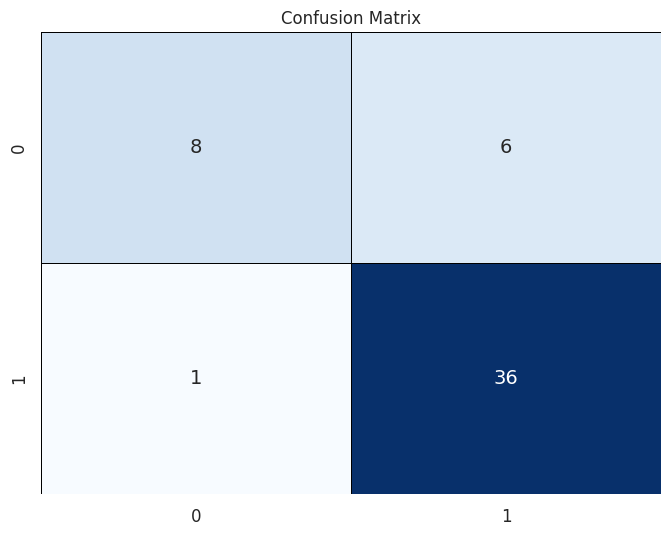

In [ ]:
y_pred = model.predict(X_test_selected)

conf_matrix = confusion_matrix(y_test, y_pred)

tick_marks = [0.5, 1.5]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 14}, linewidths=0.5, linecolor='black')
plt.xticks(tick_marks, fontsize=12)
plt.yticks(tick_marks, fontsize=12)
plt.title('Confusion Matrix')

Didapatkan 36 data terprediksi benar bahwa pasien terkena penyakit jantung, dan ada 6 pasien yang terindiasi tidak terkena penyakit jantung padahal dia memiliki penyakit jantung.

In [ ]:
model = SVC(kernel='linear', random_state=42)

cv_scores = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='recall')

print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-validation Scores: [0.78947368 0.94736842 1.         0.94444444 0.94444444]
Mean CV Score: 0.9251461988304094
Standard Deviation of CV Scores: 0.07106165562505852


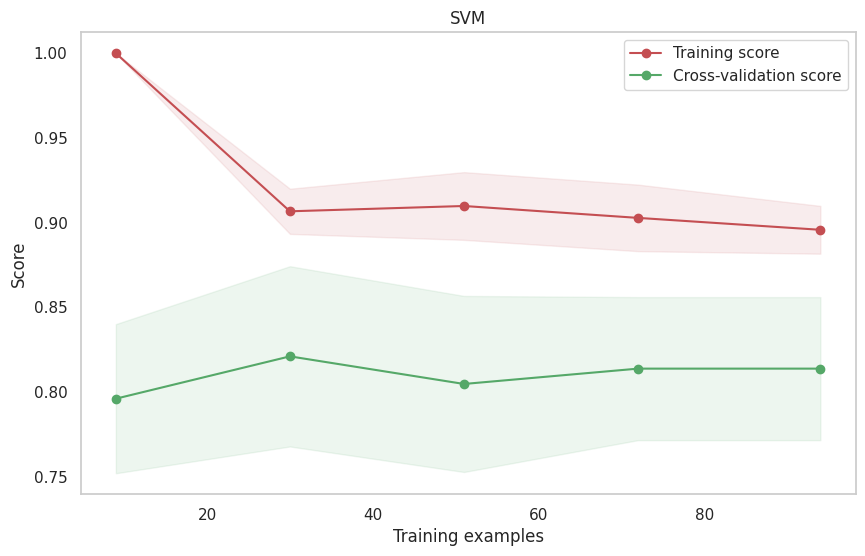

In [ ]:
model = SVC(kernel='linear', random_state=42)

plot_learning_curve(model, "SVM", X_train_selected, y_train, cv=kfold)

Training Score pada setiap fold mengalami penururan, model masih overfit, sepertinya masalah utama adalah kekurangan data samples atau mungkin perlu sedikit dituning.

Dibawah saya akan melakukan Hyperparameter Tuning terhadap model SVM menggunakan GridSearchCV.

In [ ]:
param_grid = {
  'C': [0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1],
  'kernel': ['linear']
}

svm_classifier = SVC()

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=kfold)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best Score: 0.830072463768116


Didapatkan hasil terbaik adalah dengan menggunakan parameter diatas.

### Random Forest Classifier

Text(0.5, 1.0, 'Confusion Matrix')

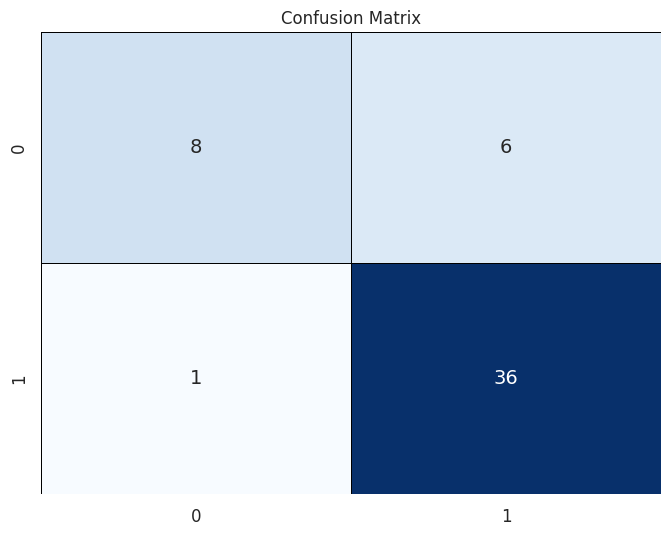

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

tick_marks = [0.5, 1.5]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 14}, linewidths=0.5, linecolor='black')
plt.xticks(tick_marks, fontsize=12)
plt.yticks(tick_marks, fontsize=12)
plt.title('Confusion Matrix')

Hasilnya sama seperti model SVM.

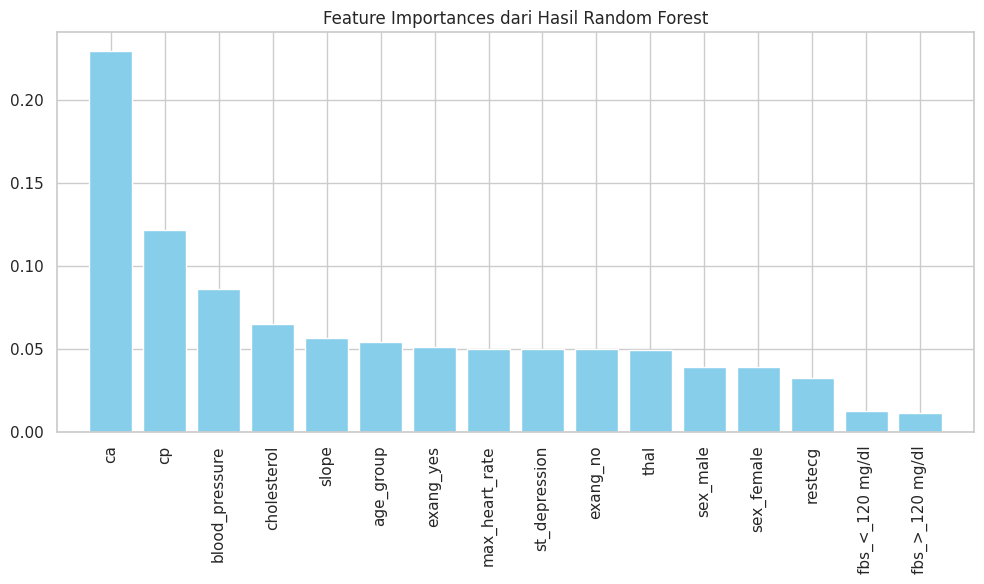

In [ ]:
importances = rf_classifier.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances dari Hasil Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

Disini didapatkan fitur-fitur penting menurut hasil Random Forest.

5 terbesar yang berpengaruh pada prediksi apakah seseorang terkena penyakit jantung atau tidak menurut model adalah ca, cp, blood_pressure, cholestero dan slope.

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='recall')

print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-validation Scores: [0.78947368 0.94736842 1.         0.94444444 0.94444444]
Mean CV Score: 0.9251461988304094
Standard Deviation of CV Scores: 0.07106165562505852


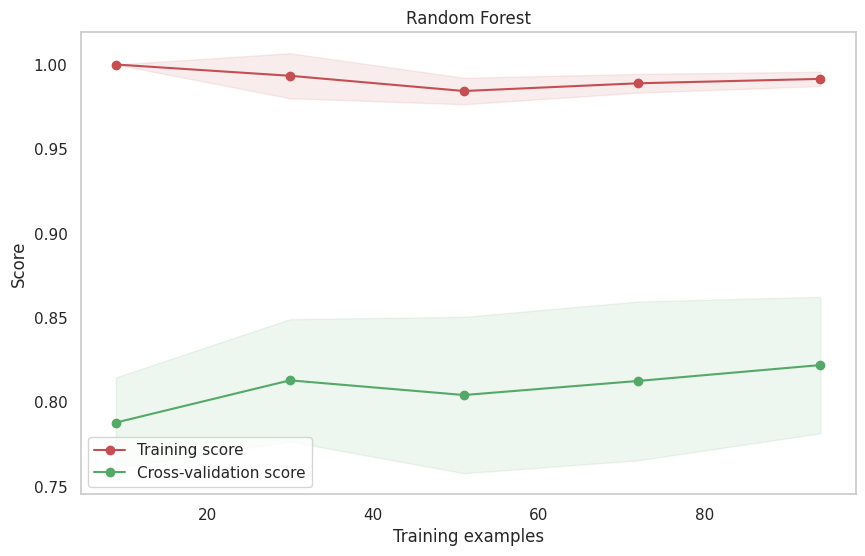

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

plot_learning_curve(rf_classifier, "Random Forest", X_train, y_train, cv=kfold)

Model sepertinya overfit, dan sangat jauh. Kemungkinan besar model ini tidak akan saya pakai.

Disini saya akan mengecek parameters terbaik untuk model Random Forest.

In [ ]:
n_estimators_range = range(20, 100, 20)

param_grid = {'n_estimators': n_estimators_range,
              'max_depth': [8,10,12,14],
              'min_samples_split': [3,4,5,6],
              'min_samples_leaf': [1,2,3]
              }

rf_classifier = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=kfold)
grid_search.fit(X_train, y_train)

print("Parameters terbaik:", grid_search.best_params_)

Parameters terbaik: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 40}


### K-Nearest Neighbors

([<matplotlib.axis.YTick at 0x7f398178ae90>,
 [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

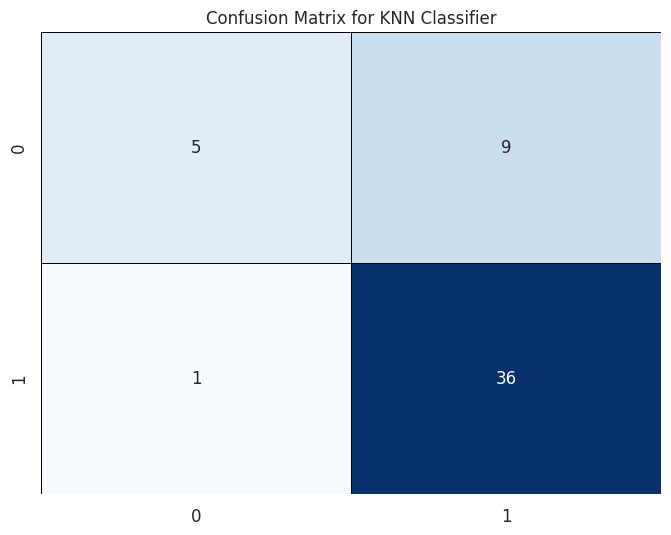

In [ ]:
optimal_k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(X_train_selected, y_train)

y_pred = knn_classifier.predict(X_test_selected)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 12}, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix for KNN Classifier')
plt.xticks(tick_marks, fontsize=12)
plt.yticks(tick_marks, fontsize=12)

Disini ada 9 pasien yang diprediksi tidak memiliki penyakit jantung, padahal sebenarnya dia terkena penyakit jantung. Ini lebih parah dibandingkan kedua model sebelumnya yang hanya 6.

In [ ]:
knn = KNeighborsClassifier()

cv_scores = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='recall')

print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-validation Scores: [0.78947368 0.94736842 1.         0.94444444 0.94444444]
Mean CV Score: 0.9251461988304094
Standard Deviation of CV Scores: 0.07106165562505852


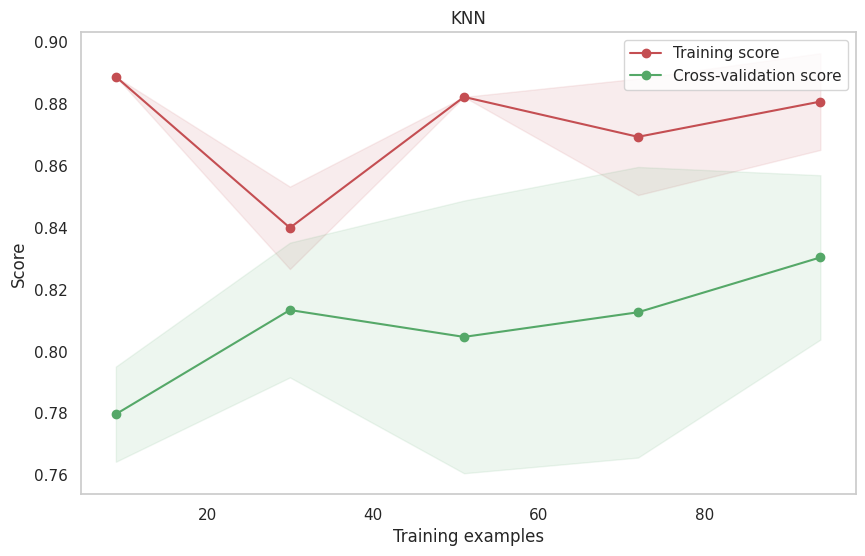

In [ ]:
knn = KNeighborsClassifier()

plot_learning_curve(knn, "KNN", X_train, y_train, cv=kfold)

Model masih overfit.

Untuk KNN saya akan mengecek jumlah optimal K terbaik untuk model.

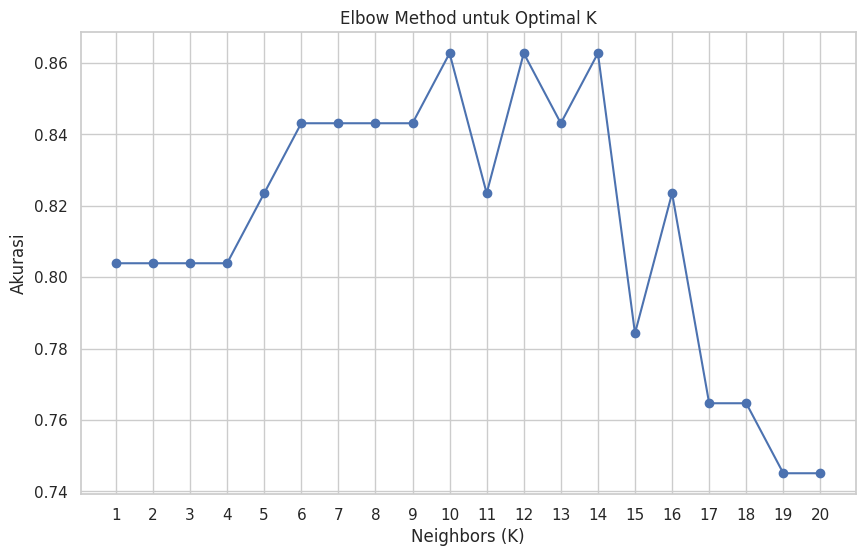

In [ ]:
k_values = range(1, 21)

accuracy_scores = []

for k in k_values:
  knn_classifier = KNeighborsClassifier(n_neighbors=k)

  knn_classifier.fit(X_train, y_train)

  accuracy_scores.append(knn_classifier.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Elbow Method untuk Optimal K')
plt.xlabel('Neighbors (K)')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)

Didapatkan jumlah K terbaik adalah 10, 12 dan 14.

## <h1>Re-Modelling

In [ ]:
df_class_0 = df[df['target'] == 0]
df_class_1 = df[df['target'] == 1]

size_class_0 = len(df_class_0)
size_class_1 = len(df_class_1)

desired_size = max(size_class_0, size_class_1)

bootstrap_df_class_0 = df_class_0.sample(n=desired_size, replace=True, random_state=42)
bootstrap_df_class_1 = df_class_1.sample(n=desired_size, replace=True, random_state=42)

bootstrap_df = pd.concat([bootstrap_df_class_0, bootstrap_df_class_1], ignore_index=True)

bootstrap_df = bootstrap_df.sample(frac=1, random_state=42)

Disini saya akan melakukan bootstrap dengan prioritas mengatasi imbalance data.

In [ ]:
X = bootstrap_df.drop(columns=['target'])
y = bootstrap_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Disini saya juga akan mengubah perbandingan split test-nya, memberikan model lebih banyak data training dengan rasio 80:20.

In [ ]:
lsvc = LinearSVC(penalty='l1', dual=False, random_state=42)

lsvc.fit(X_train, y_train)

feature_selection = SelectFromModel(lsvc, prefit=True)

X_train_selected = feature_selection.transform(X_train)

X_test_selected = feature_selection.transform(X_test)

Pinalti masih menggunakan L1.

### Support Vector Machines

In [ ]:
model = SVC(C=10, gamma=0.001, kernel='linear')

model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.86      0.79      0.83        24

    accuracy                           0.85        52
   macro avg       0.85      0.84      0.84        52
weighted avg       0.85      0.85      0.85        52



Sekilas ada peningkatan signifikan dari model setelah melakukan bootstrapping dan hyperparameter tuning.

### Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'],
                                       min_samples_leaf=grid_search.best_params_['min_samples_leaf'], min_samples_split=grid_search.best_params_['min_samples_split'],
                                       random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.95      0.88      0.91        24

    accuracy                           0.92        52
   macro avg       0.93      0.92      0.92        52
weighted avg       0.93      0.92      0.92        52



Disini model mendapatkan peningkatan juga.

### K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        28
           1       0.90      0.75      0.82        24

    accuracy                           0.85        52
   macro avg       0.86      0.84      0.84        52
weighted avg       0.85      0.85      0.84        52



Ada peningkatan juga dalam model KNN.

Tetapi disini nilai recall dari model mengalami peningkatan pada kelas 0, tetapi sepertinya mengalami penurunan pada kelas 1. Saya akan bedah lebih lanjut pada re-evaluasi dibawah,

## <h1>Re-Evaluasi

### Support Vector Machines

Text(0.5, 1.0, 'Confusion Matrix')

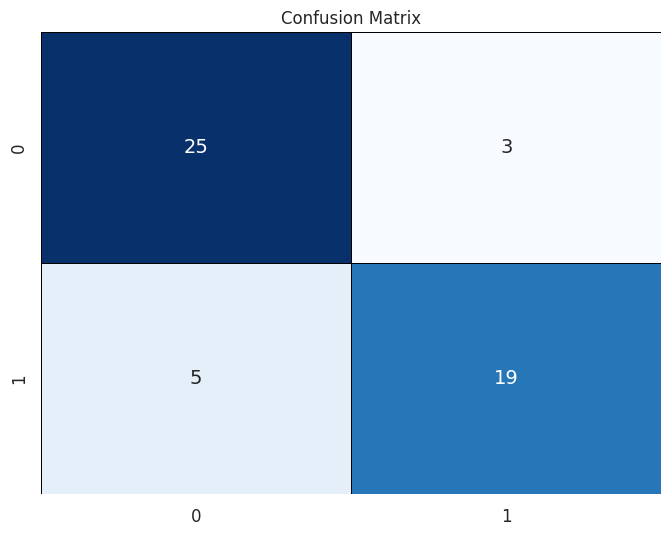

In [ ]:
y_pred = model.predict(X_test_selected)

conf_matrix = confusion_matrix(y_test, y_pred)

tick_marks = [0.5, 1.5]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 14}, linewidths=0.5, linecolor='black')
plt.xticks(tick_marks, fontsize=12)
plt.yticks(tick_marks, fontsize=12)
plt.title('Confusion Matrix')

Ternyata didapatkan adanya peningkatan dari model SVM sebelumnya, dimana disini hanya ada 3 pasien yang salah terprediksi sebagai pasien tidak berpenyakit jantung.

In [ ]:
model = SVC(kernel='linear', random_state=42)

cv_scores = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='recall')

print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-validation Scores: [0.80952381 0.76190476 0.71428571 0.66666667 0.85714286]
Mean CV Score: 0.7619047619047619
Standard Deviation of CV Scores: 0.06734350297014738


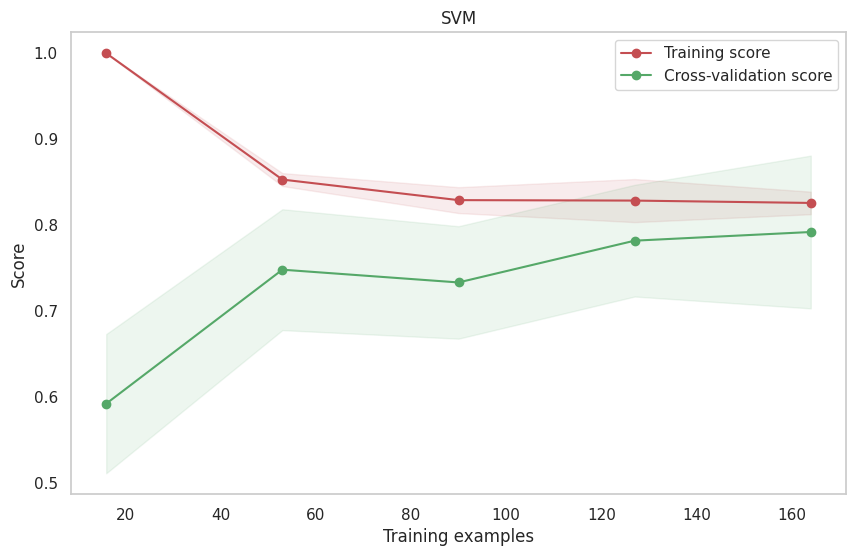

In [ ]:
model = SVC(C=10, gamma=0.001, kernel='linear')

plot_learning_curve(model, "SVM", X_train_selected, y_train, cv=kfold)

Dalam performa model juga ada peningkatan meskipun masih sedikit overfit, tetapi CV-Scores naik secara konsisten.

### Random Forest Classifier

Text(0.5, 1.0, 'Confusion Matrix')

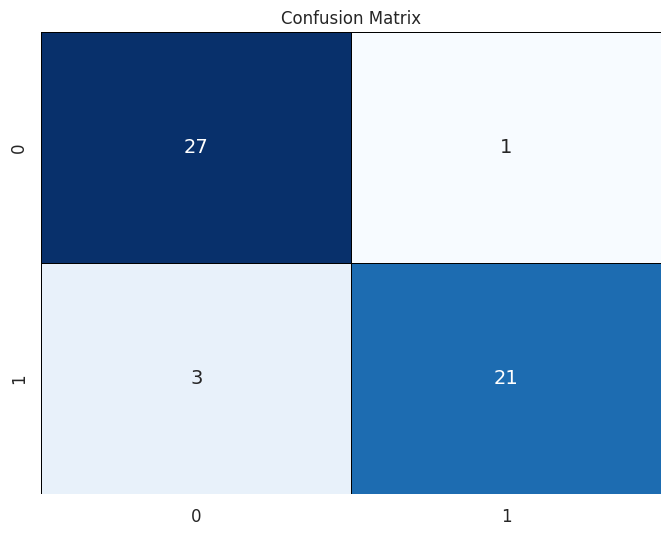

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

tick_marks = [0.5, 1.5]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 14}, linewidths=0.5, linecolor='black')
plt.xticks(tick_marks, fontsize=12)
plt.yticks(tick_marks, fontsize=12)
plt.title('Confusion Matrix')

Disini juga ada peningkatan pada prediksi.

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='recall')

print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-validation Scores: [0.80952381 0.80952381 0.76190476 0.66666667 0.85714286]
Mean CV Score: 0.780952380952381
Standard Deviation of CV Scores: 0.06459361888690732


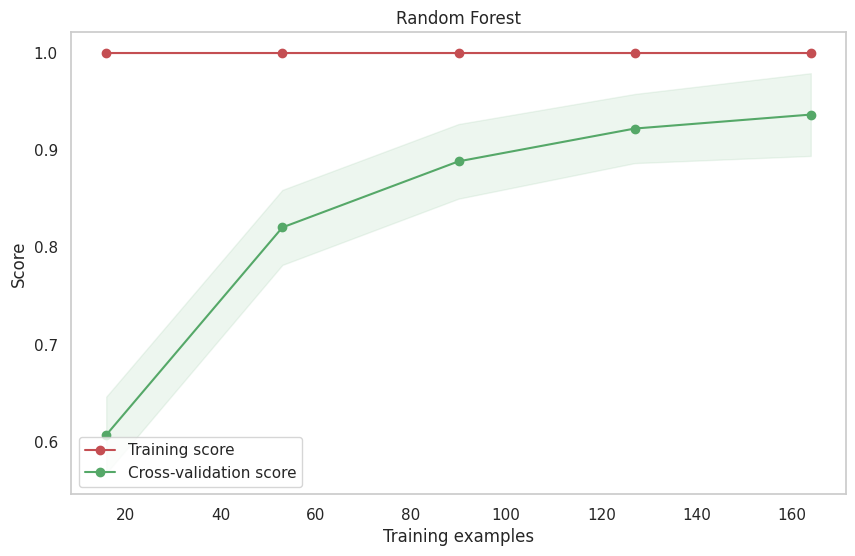

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], random_state=42)

plot_learning_curve(rf_classifier, "Random Forest", X_train, y_train, cv=kfold)

Disini model overfit, meskipun CV-Scores meroket naik konsistensinya, tetapi model terlalu menyesuaikan terhadap data training.

### K-Nearest Neighors

([<matplotlib.axis.YTick at 0x7f3981788280>,
 [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

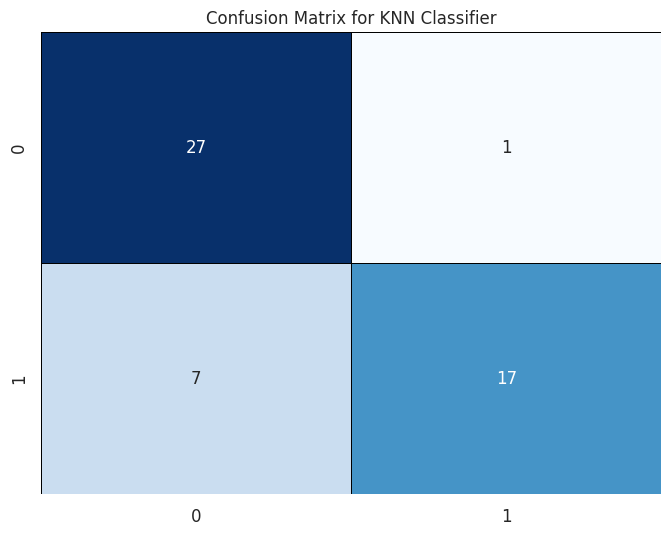

In [ ]:
optimal_k = 10
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(X_train_selected, y_train)

y_pred = knn_classifier.predict(X_test_selected)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 12}, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix for KNN Classifier')
plt.xticks(tick_marks, fontsize=12)
plt.yticks(tick_marks, fontsize=12)

Pada prediksi juga ada peningkatan signifikan.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

cv_scores = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='recall')

print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-validation Scores: [0.80952381 0.80952381 0.76190476 0.66666667 0.85714286]
Mean CV Score: 0.780952380952381
Standard Deviation of CV Scores: 0.06459361888690732


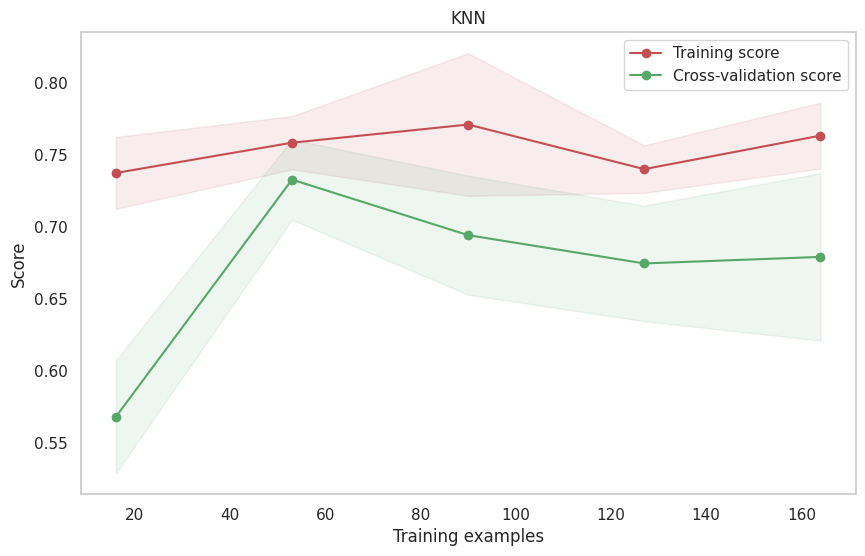

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

plot_learning_curve(knn, "KNN", X_train, y_train, cv=kfold)

Disini model masih overfit, dan tidak dapat menyesuaikan terhadap data baru nantinya.

## <h1> Hasil

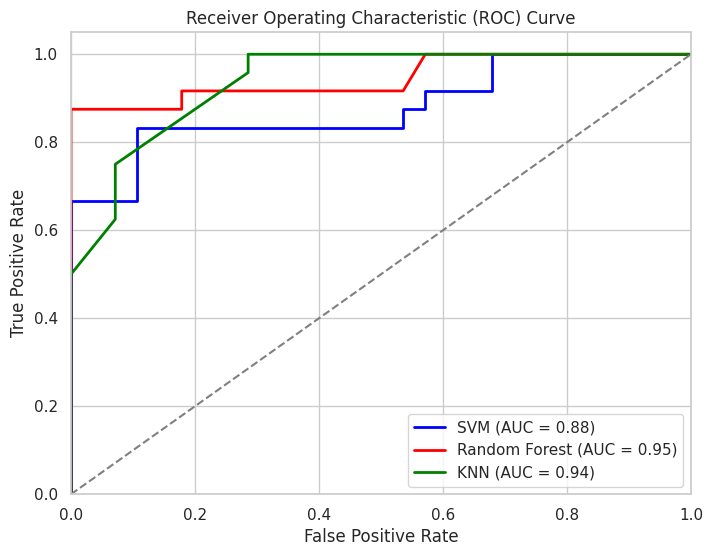

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

model.fit(X_train_selected, y_train)
rf_classifier.fit(X_train, y_train)
knn.fit(X_train, y_train)

y_pred_svm = model.decision_function(X_test_selected)
y_pred_rf = rf_classifier.predict_proba(X_test)[:, 1]
y_pred_knn = knn.predict_proba(X_test)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Jika sangat terpaksa.

Disini saya akan memakai SVM 2.0, untuk hipotesis deployment, karena performa model yang paling bagus diantara kedua model, dan metric recall juga mengalami kenaikan, meskipun ada pengurangan pada recall kelas 1 tetapi recall kelas 0 didapatkan peningkatan yang signifikan.

Meskipun mendapatkan nilai AUC terendah, model SVM 2.0 memiliki performa model terhadap unseen data lebih bagus dibandingkan model lainnya.

Disini menjadi trade-off (AUC or CV) bagi saya karena memang data ini sedikit menarik untuk dipelajari lebih lanjut (Data size kecil, imbalance pula), dan mungkin saya akan coba dengan teknik preparation yang berbeda dilain waktu.